In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

Import California housing dataset from sklearn.

In [23]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The type of data is Bunch, which has keys similar to a dictionary.

In [19]:
type(data)

sklearn.utils.Bunch

In [20]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

The 'data' key contains an array of data about features.

In [21]:
type(data['data'])

numpy.ndarray

In [8]:
data['data'].shape

(20640, 8)

In [22]:
data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [17]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MedHouseVal'] = data['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [93]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [94]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Get R^2 score for the model.

In [95]:
model.score(X_test, y_test)

0.8043989239424654

Calculate RMSE for the model.

In [96]:
pred = model.predict(X_test)

np.sqrt(sum((pred - y_test)**2)/ len(y_test))

0.5138848941087587

How many features are used in the model?

In [97]:
model.n_features_in_

8

### Preprocessing

Note that the features for the model are at different range, and if we will employ a model that is sensitive to the changes, such as SVM, rescaling the features is a must.

In [103]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [99]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

-0.027910769608740615

We got a negative R^2 score, meaning the model was arbitrarily worse to predict the target.
<br>
Retrain the model with scaled features.

In [101]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [102]:
svm = SVR()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7371704159952863

In many cases, some features don't contribute too much value to a model to predict the target. We can drop the number of features we want in a model with PCA. 

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

x_pca = pca.transform(X_scaled)

Check that the number of features has indeed reduced from 8 to 2.

In [126]:
X_scaled.shape, x_pca.shape

((20640, 8), (20640, 2))

Fetch the scatterplot of the new two features.

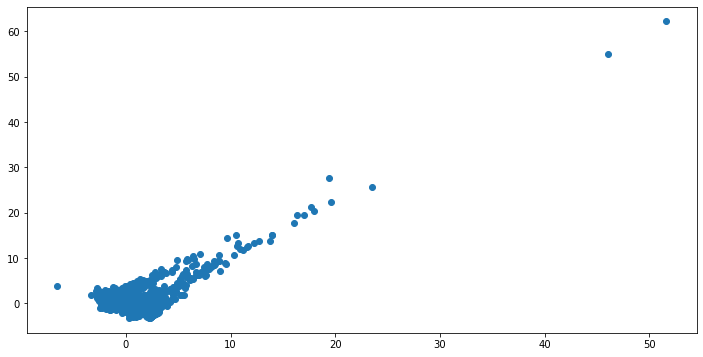

In [124]:
plt.figure(figsize=(12, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1]);

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('svm', SVR())
])

In [139]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('svm', SVR())])

In [140]:
pred = pipeline.predict(X_test)

In [141]:
pipeline.score(X_test, y_test)

0.5346447163756638

We can view the parameters in the pipeline as follows. 

In [143]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('pca', PCA(n_components=4)),
  ('svm', SVR())],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(n_components=4),
 'svm': SVR(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 4,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'svm__C': 1.0,
 'svm__cache_size': 200,
 'svm__coef0': 0.0,
 'svm__degree': 3,
 'svm__epsilon': 0.1,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

We can change any parameters with set_params.

In [149]:
pipeline.set_params(svm__C=0)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('svm', SVR(C=0))])

In [150]:
pipeline.score(X_test, y_test)

0.5346447163756638

### Saving and loading Models

We can save and recall our model later with pickle. To validate the model, call the score of the model again.

In [160]:
import pickle

model_file = 'model.pkl'

with open(model_file, 'wb') as out:
    pickle.dump(pipeline, out)

In [162]:
with open(model_file, 'rb') as fp:
    p1 = pickle.load(fp)
    
p1.score(X_test, y_test)    

0.5346447163756638